[chloeuhls.github.io](https://chloeu99.github.io/)

Data Science Final Tutorial
Jacob Waxman and Chloe Uhls

# Analysis Of Homelessness In The United States

### Introduction

For our final tutorial we will be analyzing homelessness in the United States. We are diving into the current state of homelessness, the change over time, and factors that have the biggest impact on homelessness. Furthermore, we will break down our analysis on a national level and at the state level, highlighting the observations we find in Louisiana. Stats that we will be looking for include total homeless population, rate of homelessness, and demographics. We will also look for variables correlating with the rate of homelessness at the state level. These factors will include geographic location, local politics, and minimum wage. 

We will divide our analysis into 3 parts.

#### 1. National Observations - Analyzing Key Homeless Statistics 

#### 2. Correlated Variables Impacts - Analyzing On A State-By-State Basis, Highlighting Louisiana and Correlated Variables

#### 3. Conclusions and Predictions - Homelessness Takeaways and Predicting The State Of Homelessness in 2021 and Beyond

### Collaboration Plan

Throughout the semester we will be meeting twice a week to work on our project. We will meet virtually via Zoom and in person depending on the week. We have a Github repository (https://github.com/chloeu99/chloeu99.github.io) to collaborate and save our coding progress. We use Google Docs for written reports, then upload it to Github to keep everything organized. In terms of coding, we will use the same strategies that we learned in class: Python coding and data scraping and the pandas library for analysis.

### Datasets Used

#### 1. 2007 - 2020 PIT (Point In Time) Estimates by State from HUD exchange                                                         

Link: https://www.huduser.gov/portal/sites/default/files/xls/2007-2020-PIT-Estimates-by-state.xlsx

This data was really exciting to find. The HUD does a great job posting their records on a yearly basis. We downloaded the excel sheet and uploaded it to our public Github. The spreadsheet breaks homelessness down into specific categories including total homelessness by state, demographics, and status of homeless citizens (sheltered, unsheltered, etc). 

Example Questions: How many people are homeless in Louisiana? Is one gender or one race more likely to be homeless on a national level? What is the change in national homelessness from 2007 to 2020?


#### 2. List Of US States By Historical Population

Link: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_historical_population

This Wikipedia table holds the census data for the population of each state every 10 years. It will be helpful when both the 2020 status of homelessness, and analyzing change of homeless over time. We can sum up each state to find total population and break down the country by states. 

Example Question: In the HUD data it is clear that California has the highest homeless population, but is it a higher population out of their total population than other states?


#### 3. Minimum Wage By State (2021)

Link: https://minimumwage.com/in-your-state/

This data contains a table of each state and their minimum wage. The federal minimum wage has been stagnant at $7.25 since 2009. Not all states have required a higher state-wide minimum wage, but we expect that those with their own regulations will have a lower homeless population.

Example Questions: Is there a correlation between a state's minimum wage and homeless population?

#### 4. Electoral College Results By State (1980-2020)

Link: https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state

We went to Wikipedia to find the state-wide Electoral College results for Presidential Elections. We will be analyzing election results from 1980 to 2020, and will look to see if a state's political consciounce is correlated with its homeless population.

Example Questions: Is there any correlation between a states politics and homeless population? How has national homeless changed as the presidency has changed?

#### 5. Average Temperature By State (2019)

Link: https://worldpopulationreview.com/state-rankings/average-temperatures-by-state

We are predicting that there is a higher homeless population in warmer states. This will be used as an ease-in analysis, something that we believe is fairly obvious. It will show our approach when working with the dataframe.

Example question: Does the coldest state have the lowest homeless population?

# Data Collection

In [144]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import io
from bs4 import BeautifulSoup
# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.options.mode.chained_assignment = None 

### HUD PIT (Point In Time) Homelessness Report (2020)

In [145]:
#reading in a HUD csv file from Github
HUD2020 = pd.read_csv("./data/HUD2020.csv")

#keeps most relevant columns
HUD2020 = HUD2020[["State","Overall Homeless, 2020","Overall Homeless - Under 18, 2020", "Overall Homeless - Age 18 to 24, 2020", "Overall Homeless - Over 24, 2020", "Overall Homeless - Female, 2020", "Overall Homeless - Male, 2020", "Overall Homeless - Transgender, 2020", "Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020", "Overall Homeless - White, 2020", "Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020", "Overall Homeless - American Indian or Alaska Native, 2020", "Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020", "Overall Homeless - Multiple Races, 2020",]]

#removes data from additional rows- only 50 states
HUD2020 = HUD2020.drop([3,8,12,27,42,50,56,57])

#columns for state name and id
HUD2020["State ID"] = HUD2020["State"] 
HUD2020["State"] = HUD2020["State"].map({"AK":"Alaska", "AL":"Alabama", "AR": "Arkansas", "AZ": "Arizona", "CA":"California", "CO":"Colorado", "CT":"Connecticut", "DE":"Delaware","FL":"Florida", "GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota", "MO":"Missouri","MS":"Mississippi","MT":"Montana","NC":"North Carolina", "ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NV":"Nevada","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming"})

HUD2020.head()

,State,"Overall Homeless, 2020","Overall Homeless - Under 18, 2020","Overall Homeless - Age 18 to 24, 2020","Overall Homeless - Over 24, 2020","Overall Homeless - Female, 2020","Overall Homeless - Male, 2020","Overall Homeless - Transgender, 2020","Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020","Overall Homeless - White, 2020","Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020","Overall Homeless - American Indian or Alaska Native, 2020","Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020","Overall Homeless - Multiple Races, 2020",State ID
0,Alaska,1949,326,197,1426,828,1114,3,4,126,634,137,22,890,40,226,AK
1,Alabama,3351,528,198,2625,1294,1988,9,4,126,1462,1755,2,37,11,73,AL
2,Arkansas,2366,195,258,1913,798,1561,5,2,53,1353,901,4,42,21,45,AR
4,Arizona,10979,1722,824,8433,4228,6694,43,14,2355,6901,2289,77,1027,60,625,AZ
5,California,161548,16141,13391,132016,53505,105737,1601,705,51966,87439,49610,3240,6386,1784,13089,CA


This table has a row for each state in the US and has a column for different homeless statistics including total people and by categories including age, gender, and race. We cleaned this table to only include the most relevant columns.

### 2020 State Census Data

In [146]:
#Data found for state population over time
r0 = requests.get("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_historical_population")
#parse
root0 = BeautifulSoup(r0.content)
#find table to make df
table0 = root0.find_all("table")[3]
#read html table as df
pop = pd.read_html(str(table0))
#clean
pop = pd.concat(pop)

#remove non-state rows
pop = pop.drop([2,9,12,37,42,48,56])

#remove columns before 1980
pop = pop.drop(columns = ["1960","1970"])

#rename columns
pop = pop.rename(columns={"Name":"State","1980":"1980 Population","1990":"1990 Population","2000":"2000 Population","2010":"2010 Population","2020":"2020 Population"})

pop.head()

,State,1980 Population,1990 Population,2000 Population,2010 Population,2020 Population
0,Alabama,3893888,4040587,4447100,4779736,5024279
1,Alaska,401851,550043,626932,710231,733391
3,Arizona,2718215,3665228,5130632,6392017,7151502
4,Arkansas,2286435,2350725,2673400,2915918,3011524
5,California,23667902,29760021,33871648,37253956,39538223


We will use the state population data to put homelessness into a better perspective. We can compare state homeless data and analyze how it is changing over time. We trimmed our data to start at 1980 to keep it relatively recent findings.

### Minimum Wage By State (2021)

In [147]:
#Data found for minimum wage by state
r = requests.get("https://minimumwage.com/in-your-state/")
#parse
root = BeautifulSoup(r.content)
#find table to make df
table = root.find("table")
#read html table as df
wages = pd.read_html(str(table))
#clean
wages = pd.concat(wages)
#drop all columns except state and wage
wages = wages[["State","Minimum Wage"]]

#cleans data
for key, value in wages.iterrows():
    wages["Minimum Wage"][key] = str(wages["Minimum Wage"][key])[1:]
    
wages.head()

,State,Minimum Wage
0,Alabama,7.25
1,Alaska,10.34
2,Arizona,12.15
3,Arkansas,11.00
4,California,14.00


DataFrame of 50 rows (each state) and two columns (State and Minimum Wage). The Federal Minimum Wage is $7.25. Any higher wages was set by the state, potentially impacting rate of homelessness. This data was cleaned by removing the dollar sign from the wage value.

### Electoral College Results By State (1980-2020)

In [148]:
#data for which party each state voted for in presidential elections 
r1 = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state")
#parse
root1 = BeautifulSoup(r1.content)
#find table
table1 = root1.find("table")
#read as table
votes = pd.read_html(str(table1))
votes = pd.concat(votes)
#remove nans at end
votes = votes[:54]
#clean year data
votes[59][0] = 2000
votes[64][0] = 2016
#cut data down to range from 1980-2020 elections
votes = votes[[0,54,55,56,57,58,59,61,62,63,64,65]]
#clean - set years to column values

for columns in votes:
    votes.rename({columns:str(votes[columns][0]) + " Electoral Vote"},inplace=True, axis="columns")
votes = votes.rename({"State Electoral Vote":"State"}, axis="columns")

#removes non state rows
votes = votes.drop([0,26,53])
votes.head()

,State,1980 Electoral Vote,1984 Electoral Vote,1988 Electoral Vote,1992 Electoral Vote,1996 Electoral Vote,2000 Electoral Vote,2004 Electoral Vote,2008 Electoral Vote,2012 Electoral Vote,2016 Electoral Vote,2020 Electoral Vote
1,Alabama,R,R,R,R,R,R,R,R,R,R,R
2,Alaska,R,R,R,R,R,R,R,R,R,R,R
3,Arizona,R,R,R,R,D,R,R,R,R,R,D
4,Arkansas,R,R,R,D,D,R,R,R,R,R,R
5,California,R,R,R,D,D,D,D,D,D,D,D


Each state is tabled with their Presidential Electoral votes since 1980. This data was found on Wikipedia and can be used great for time charts. We will look to see if the values from this chart have a measurable impact on a states homeless population. It can also be mapped on a national level. We cleaned the table up and removed non state rows. We believe the 40 year timeline begining in 1980 is measurable range of values. 

### Average Temperature By State (2019)

In [149]:
#data for average 2019 temperature by state - came pre organized in descending order
r2 = requests.get("https://worldpopulationreview.com/state-rankings/average-temperatures-by-state")
#parse
root2 = BeautifulSoup(r2.content)
table2 = root2.find("table")
#make df
temps = pd.read_html(str(table2))
temps = pd.concat(temps)
temps.head()

,State,Average Temperature
0,Florida,70.7
1,Hawaii,70.0
2,Louisiana,66.4
3,Texas,64.8
4,Georgia,63.5


This table shows the states average temperature during 2019 measured in Farhrenheit. We will map this table to the homeless df to predict homeless population by temperature. 

# Data Merging

If you noticed above, all the data was cleaned so that each dataframe has 50 rows, one for each state, named accordingly. By cleaning our data, we made merging the table much easier. In this section we will combine all of our tables into one. We will use a few outer merge calls in order to add our columns together by state names.

In [150]:
#combines wages and temperatures by states
temp_wages = temps.merge(wages, on= "State", how = "outer")
#combines previous table with election results
elections_temp_wages = temp_wages.merge(votes, on="State", how = "outer")
#Sorry DC and Puerto Rico
elections_temp_wages = elections_temp_wages.dropna()

#add population table
elections_temp_wages_pop = elections_temp_wages.merge(pop, on= "State", how = "outer")

#Complete DataFrame with homeless stats
df2020 = elections_temp_wages_pop.merge(HUD2020, on="State", how="outer")

#cast and rename column variables
df2020["Average Temperature"] = df2020["Average Temperature"].astype(float)
df2020["Overall Homeless, 2020"] = df2020["Overall Homeless, 2020"].astype(int)
df2020 = df2020.rename({"1980":"1980 Election Result","1984":"1984 Election Result","1988":"1988 Election Result","1992":"1992 Election Result","1996":"1996 Election Result",2000:"2000 Election Result","2004":"2004 Election Result","2008":"2008 Election Result","2012":"2012 Election Result",2016:"2016 Election Result","2020":"2020 Election Result"}, axis="columns")
    
df2020.head()

,State,Average Temperature,Minimum Wage,1980 Electoral Vote,1984 Electoral Vote,1988 Electoral Vote,1992 Electoral Vote,1996 Electoral Vote,2000 Electoral Vote,2004 Electoral Vote,...,"Overall Homeless - Transgender, 2020","Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020","Overall Homeless - White, 2020","Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020","Overall Homeless - American Indian or Alaska Native, 2020","Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020","Overall Homeless - Multiple Races, 2020",State ID
0,Florida,70.7,8.65,R,R,R,R,D,R,R,...,52,22,4045,15102,11042,128,328,73,814,FL
1,Hawaii,70.0,10.10,D,R,D,D,D,D,D,...,36,27,935,1469,295,564,83,2160,1887,HI
2,Louisiana,66.4,7.25,R,R,R,D,D,R,R,...,11,3,88,1165,1908,21,29,5,45,LA
3,Texas,64.8,7.25,R,R,R,R,R,R,R,...,61,21,7545,15778,10001,206,346,89,809,TX
4,Georgia,63.5,7.25,D,R,R,D,R,R,R,...,44,107,520,3031,6708,92,64,21,318,GA


### Additional Calculations
With our combined DataFrame, we can now perform some calculations on our data. For example we will find the rate of homelessness in each state

In [151]:
df2020["Homeless Rate"] = df2020["Overall Homeless, 2020"] / df2020["2020 Population"].astype(int)

# Analysis Part 1:  National Observations
## Summary Statistics
### Sum
The United States has 569,334 homeless people

In [152]:
df2020["Overall Homeless, 2020"].sum()

569334

### Mean
###### Average Of Averages 

Average State has ~11,386 homeless people

In [153]:
df2020["Overall Homeless, 2020"].mean()

11386.68

#### Average Homeless Rate
##### Average Of Averages
The average state has a homeless rate of 0.14%

In [154]:
df2020["Homeless Rate"].mean()

0.00140329255293916

##### True Average
Marginal difference. Closer to 0.17%

In [155]:
df2020["Overall Homeless, 2020"].astype(float).sum() / df2020["2020 Population"].astype(float).sum()

0.0017212794852033981

### Outliers

#### Max
California has the highest homeless population at 161,548 people

In [156]:
df2020["Overall Homeless, 2020"].max()

161548

In [157]:
df2020.loc[df2020["Overall Homeless, 2020"].idxmax()].head(1)

State    California
Name: 11, dtype: object

In [219]:
df2020.loc[df2020["2020 Population"].astype(int).idxmax()].head(1)

State    California
Name: 11, dtype: object

But the state also has the largest total population, so let's look into the rate of homeless.  

In [217]:
df2020.loc[df2020["Homeless Rate"].idxmax()].head(1)

State    New York
Name: 36, dtype: object

In [216]:
df2020["Homeless Rate"].max()

0.004518086975711254

New York has the highest rate of homeless at 0.45%

#### Min 
North Dakota has the lowest homeless population at 541 people

In [161]:
df2020["Overall Homeless, 2020"].min()

541

In [162]:
df2020.loc[df2020["Overall Homeless, 2020"].idxmin()].head(1)

State    North Dakota
Name: 48, dtype: object

Yet they do not have the lowest total population - Wyoming is the smallest state. The state with smallest homeless rate is Mississippi.

In [163]:
df2020.loc[df2020["2020 Population"].astype(int).idxmin()].head(1)

State    Wyoming
Name: 45, dtype: object

In [164]:
df2020.loc[df2020["Homeless Rate"].idxmin()].head(1)

State    Mississippi
Name: 5, dtype: object

### Spread
The standard deviation of homelessness in the US is 25,559 - this is extremely dispersed data.

In [165]:
df2020["Overall Homeless, 2020"].std()

25559.470407818764

## Visual Representation
Map of US - highlighting each state's homeless rate

In [166]:
#Using mapping data andinspiration from: https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#data mapping for all states
USmap = geopandas.read_file('./data/map_data/usa-states-census-2014.shp')
USmap = USmap.to_crs("EPSG:3395")
USmap["State"] = USmap["NAME"]
#join with homeless data
USmap = USmap.merge(df2020, on = "State", how = "inner")
#clean data to present in map
for key, value in USmap.iterrows():
    USmap["Homeless Rate"][key] = str(float(str(USmap["Homeless Rate"][key])[:7])*100)[:5] + " %"

Text(0.5, 1.0, 'Map of US By Homeless Rate')

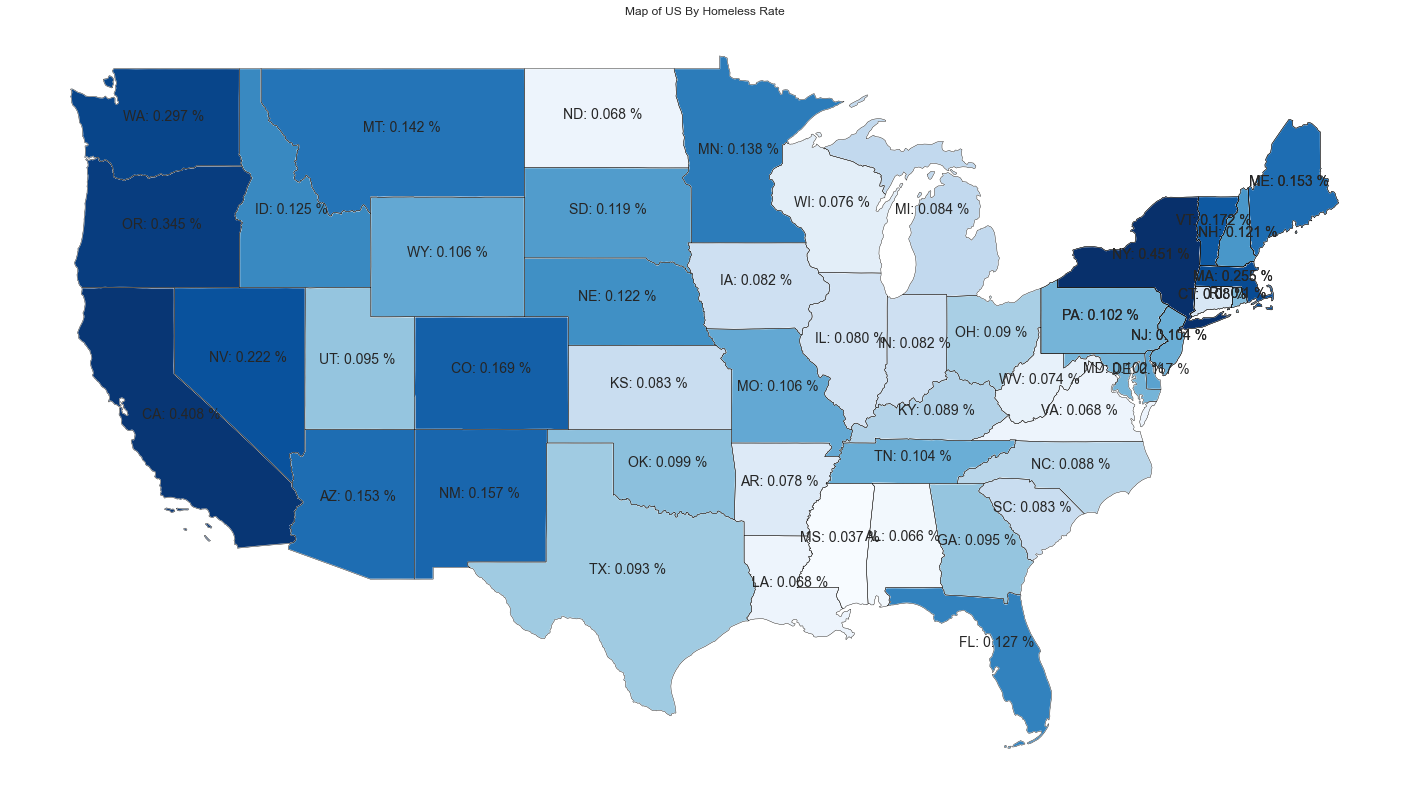

In [236]:
#Using mapping data andinspiration from: https://jcutrer.com/python/learn-geopandas-plotting-usmaps
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
#label state with homeless rate
USmap.apply(lambda x: ax.annotate(text=x["State ID"] + ": " + x["Homeless Rate"], xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
#state boundries
USmap.boundary.plot(ax=ax, color='Black', linewidth=.4)
#color states and labels
USmap.plot(column = "Homeless Rate", ax=ax, cmap='Blues', figsize=(12, 12))
ax.text(-0.05, 0.5, transform=ax.transAxes,
        fontsize=20, color='black', alpha=0.5,
        ha='center', va='center', rotation='90', s = "")
ax.set_axis_off()
plt.title("Map of US By Homeless Rate")

*We were trying to make this a heat map but had difficulties adjusting the scalar and color scheme seperately. We still think this is a cool visual to see each states homeless rate.*

## Demographic Distribution

**Bar chart of national homeless by gender**

More homeless men than women.

<AxesSubplot:title={'center':'2021 National Homeless Count By Gender'}, xlabel='Gender', ylabel='Homeless Count'>

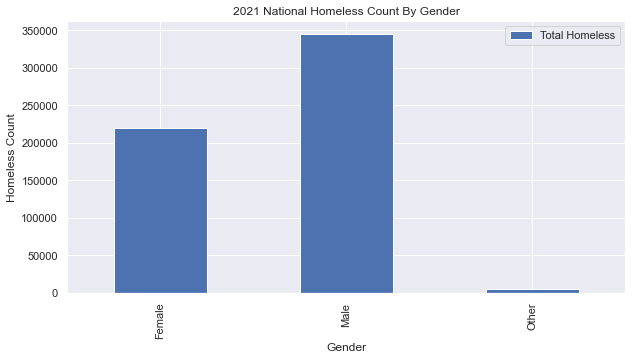

In [168]:
genders = df2020[["State","Overall Homeless - Female, 2020", "Overall Homeless - Male, 2020", "Overall Homeless - Transgender, 2020", "Overall Homeless - Gender Non-Conforming, 2020"]]
genders = genders.set_index("State")
genders = genders.astype(int)

female = genders["Overall Homeless - Female, 2020"].sum()
male = genders["Overall Homeless - Male, 2020"].sum()
other = genders["Overall Homeless - Transgender, 2020"].sum() + genders["Overall Homeless - Gender Non-Conforming, 2020"].sum()

gendersums = pd.DataFrame.from_dict({"Female":female,"Male":male,"Other":other},orient='index',columns=["Total Homeless"])
sns.set(rc={"figure.figsize":(10,5)})
gendersums.plot.bar(xlabel= "Gender", ylabel = "Homeless Count", title = "2021 National Homeless Count By Gender")

**Pie Chart Of Homeless By Age**

Adults make up the largest portion of the homeless population but there are a large percent of homeless kids and young adults in the country.

# Analysis Part 2: Correlated Variables
## Louisiana Findings

In [170]:
louisiana = df2020[2:3]
louisiana[["State","Overall Homeless, 2020", "Homeless Rate"]]

,State,"Overall Homeless, 2020",Homeless Rate
2,Louisiana,3173,0.000681


In [171]:
df2020[ "Homeless Rate"].quantile(.04)

0.000680658471320999

In [172]:
df2020[["State", "Homeless Rate"]].sort_values(by = "Homeless Rate", ascending = True).head()

,State,Homeless Rate
5,Mississippi,0.000374
6,Alabama,0.000667
2,Louisiana,0.000681
16,Virginia,0.000690
48,North Dakota,0.000694


Louisiana has a smaller total homeless population than the national average (11,000) and smaller homeless rate (0.17%). Louisiana actually has the third lowest homeless rates in the country. Congrats Mississippi and Alabama!

### Homeless By State Temperature

In [173]:
homeless_temp = df2020[["Average Temperature","Homeless Rate","State ID"]]
homeless_temp.set_index("State ID", inplace= True)

Weak Negative Correlation

In [174]:
homeless_temp["Average Temperature"].corr(homeless_temp["Homeless Rate"])

-0.09553567731307452

Text(0.5, 1.0, "Scatter Of 2020 Homeless Rate By A State's Average Yearly Temperature")

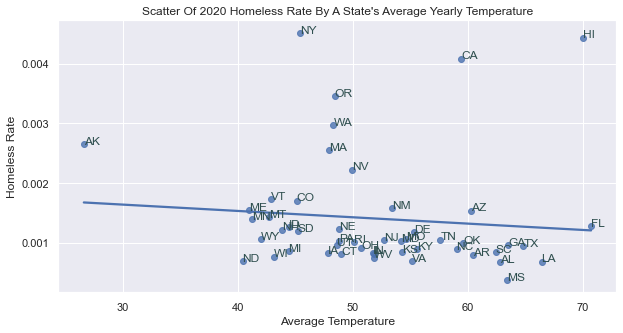

In [175]:
fig, ax = plt.subplots()
sns.set(rc={"figure.figsize":(15,7.5)})

plot1 = sns.regplot(x = "Average Temperature",
            y = "Homeless Rate", 
            ci = None,
            ax=ax,
            data = homeless_temp)

#labels each dot based on its state id
for k, v in homeless_temp.iterrows():
    ax.annotate(k, v, family='sans-serif', fontsize=12, color='darkslategrey')
fig.canvas.draw()

plot1.set_title("Scatter Of 2020 Homeless Rate By A State's Average Yearly Temperature")

Hawaii is an interesting point on this chart. One would assume that homeless people would prefer to be in southern states to avoid cold winters up north, but you cannot make this hypothesis for Hawaii. The homeless people in Hawaii have most likely been there their entire lives. Alaska is also alarming because it is the coldest state, isolated like Hawaii, and still has a high rate of homelessness. New York and California also standout but do not surprise me due to the high costs of living in major urban areas. 

### Homeless By State Minimum Wage

In [176]:
homeless_wage = df2020[["Minimum Wage","Homeless Rate", "State ID"]]
homeless_wage["Minimum Wage"] = homeless_wage["Minimum Wage"].astype(float)
homeless_wage["Homeless Rate"] = homeless_wage["Homeless Rate"].astype(float)
homeless_wage.set_index("State ID", inplace = True)

Moderate Positive Correlation

In [177]:
homeless_wage["Minimum Wage"].corr(homeless_wage["Homeless Rate"])

0.5908830206536951

Scatter Chart

Text(0.5, 1.0, "Scatter Of 2020 Homeless Rate By A State's Minimum Wage")

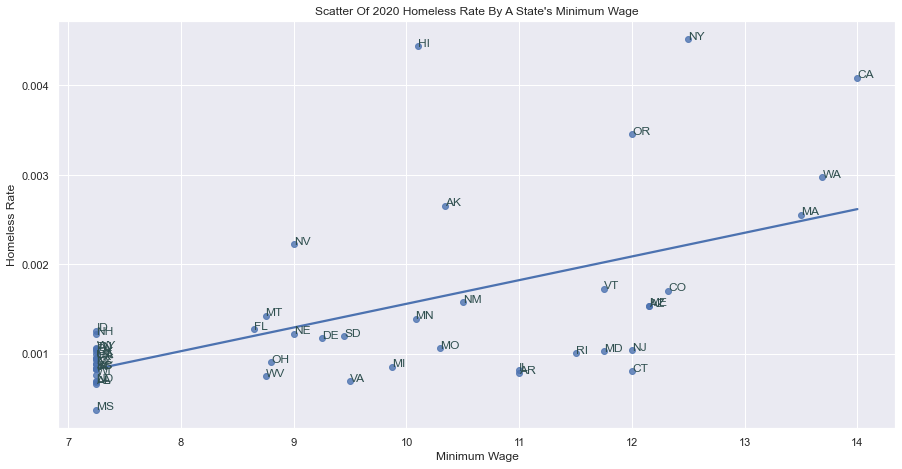

In [178]:
fig, ax = plt.subplots()
sns.set(rc={"figure.figsize":(15,7.5)})
plot2 = sns.regplot(x = "Minimum Wage",
            y = "Homeless Rate", 
            ci = None,
            ax=ax,
            data = homeless_wage)

#labels each dot based on its state id
for k, v in homeless_wage.iterrows():
    ax.annotate(k, v, family='sans-serif', fontsize=12, color='darkslategrey')
fig.canvas.draw()
plot2.set_title("Scatter Of 2020 Homeless Rate By A State's Minimum Wage")

Louisiana ($7.25) minimum wage is overlapped by a clump of other states that has left their minim wage at the federal minimum. There is a wide discrepency in this category as many states use the federal minimum wage. The rest of the data has a clear correlation. As minimum wage increases, rate of homelessness increases. Now this data can be decieving - and doesn't help as much. One would expect a higher minimum wage would reduce homelessness, but there is another key factor here: population size. Large states with major cities likely have a higher minimum wage and a higher homeless rate. 

### Homelessness By State 2020 Electoral Vote

<AxesSubplot:title={'center':'Average Homeless Rate By States 2020 Electoral Vote'}, xlabel='2020 Electoral Vote', ylabel='2020 Homeless Rate'>

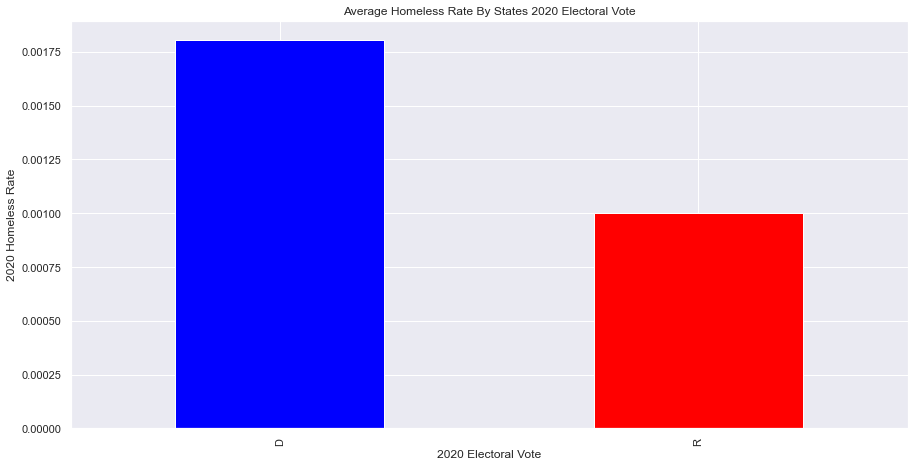

In [179]:
df2020.groupby("2020 Electoral Vote").mean()["Homeless Rate"].plot.bar(color = ["blue","red"],ylabel ="2020 Homeless Rate", title = "Average Homeless Rate By States 2020 Electoral Vote")

I think this line of code is really sleek and offers a great insight into homelessness. What you see above is the average rate of homelessness for states that voted Democrat against Republican states in the 2020 Presidential Election

# Analysis Part 3: Conclusions and Predictions
#### In order to make predictions about the future of homelessness in the US we need to take a look in the past. We will go back to the HUD data, now observing every Point In Time Sheet Available (Starting in 2007)
#### Data Collection

In [206]:
#reset 2020 data
HUD2020 = pd.read_csv("./data/HUD2020.csv")
HUD2020 = HUD2020[["State","Overall Homeless, 2020"]]

#2019 total homeless by state
HUD2019 = pd.read_csv("./data/HUD2019.csv")
HUD2019 = HUD2019[["State","Overall Homeless, 2019"]]

#2018 total homeless by state
HUD2018 = pd.read_csv("./data/HUD2018.csv")
HUD2018 = HUD2018[["State","Overall Homeless, 2018"]]

#2017 total homeless by state
HUD2017 = pd.read_csv("./data/HUD2017.csv")
HUD2017 = HUD2017[["State","Overall Homeless, 2017"]]

#2016 total homeless by state
HUD2016 = pd.read_csv("./data/HUD2016.csv")
HUD2016 = HUD2016[["State","Overall Homeless, 2016"]]

#2015 total homeless by state
HUD2015 = pd.read_csv("./data/HUD2015.csv")
HUD2015 = HUD2015[["State","Overall Homeless, 2015"]]

#2014 total homeless by state
HUD2014 = pd.read_csv("./data/HUD2014.csv")
HUD2014 = HUD2014[["State","Overall Homeless, 2014"]]

#2013 total homeless by state
HUD2013 = pd.read_csv("./data/HUD2013.csv")
HUD2013 = HUD2013[["State","Overall Homeless, 2013"]]

#2012 total homeless by state
HUD2012 = pd.read_csv("./data/HUD2012.csv")
HUD2012 = HUD2012[["State","Overall Homeless, 2012"]]

#2011 total homeless by state
HUD2011 = pd.read_csv("./data/HUD2011.csv")
HUD2011 = HUD2011[["State","Overall Homeless, 2011"]]

#2010 total homeless by state
HUD2010 = pd.read_csv("./data/HUD2010.csv")
HUD2010 = HUD2010[["State","Overall Homeless, 2010"]]

#2009 total homeless by state
HUD2009 = pd.read_csv("./data/HUD2009.csv")
HUD2009 = HUD2009[["State","Overall Homeless, 2009"]]

#2008 total homeless by state
HUD2008 = pd.read_csv("./data/HUD2008.csv")
HUD2008 = HUD2008[["State","Overall Homeless, 2008"]]

#2007 total homeless by state
HUD2007 = pd.read_csv("./data/HUD2007.csv")
HUD2007 = HUD2007[["State","Overall Homeless, 2007"]]

#### Data Merging

In [207]:
#2019-2020
HUDall = HUD2020.merge(HUD2019, on= "State", how = "inner")
#2018-2020
HUDall = HUDall.merge(HUD2018, on= "State", how = "inner")
#2017-2020
HUDall = HUDall.merge(HUD2017, on= "State", how = "inner")
#2016-2020
HUDall = HUDall.merge(HUD2016, on= "State", how = "inner")
#2015-2020
HUDall = HUDall.merge(HUD2015, on= "State", how = "inner")
#2014-2020
HUDall = HUDall.merge(HUD2014, on= "State", how = "inner")
#2013-2020
HUDall = HUDall.merge(HUD2013, on= "State", how = "inner")
#2012-2020
HUDall = HUDall.merge(HUD2012, on= "State", how = "inner")
#2011-2020
HUDall = HUDall.merge(HUD2011, on= "State", how = "inner")
#2010-2020
HUDall = HUDall.merge(HUD2010, on= "State", how = "inner")
#2009-2020
HUDall = HUDall.merge(HUD2009, on= "State", how = "inner")
#2008-2020
HUDall = HUDall.merge(HUD2008, on= "State", how = "inner")
#2007-2020
HUDall_dirty = HUDall.merge(HUD2007, on= "State", how = "inner")
#removes data from additional rows- only 50 states
HUDall = HUDall_dirty.drop([3,8,12,27,42,50])
HUDall.rename(columns = {"State":"State ID"}, inplace =True)
df2020 = df2020.merge(HUDall, on = "State ID", how = "inner")

#### Clean Data

In [208]:
#remove rest of string from label - only keeps year id
for columns in HUDall:
    HUDall.rename({columns:columns[-4:]},inplace=True, axis="columns")
    
#flips rows and columns
HUDall = HUDall.transpose()

#sets state label to column id
for columns in HUDall:
    HUDall.rename({columns:HUDall[columns][0]},inplace=True, axis="columns")
HUDall.drop(["e ID"], inplace = True)

#flip rows
HUDall = HUDall.sort_index(ascending=True)

#make year index a column
HUDall.reset_index(inplace=True)

#rename index to year
HUDall.rename(columns={"index":"Year"},inplace=True)
#cast as ints
HUDall = HUDall.astype(int)
HUDall.head()

,Year,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,Total
0,2007,1642,5452,3836,14646,138986,14225,4482,1061,48069,...,11210,39788,3011,9746,1035,23379,5648,2409,537,647258
1,2008,1646,5387,3255,12488,136531,14747,4627,933,50158,...,9705,40190,3434,8469,954,21954,5449,2016,751,639784
2,2009,1992,6080,2852,14721,123678,15268,4605,1130,55599,...,10532,36761,3795,8852,1214,22782,6525,1667,515,630227
3,2010,1863,6046,2762,13711,123480,15482,4316,982,57551,...,10276,35121,3284,9080,1220,22878,6333,2264,579,637077
4,2011,2128,5558,3424,10504,125128,15116,4456,1035,56687,...,9113,36911,3130,8816,1144,20439,5785,2211,1038,623788


### Change In Homelessness Over Time - Nationwide (Since 2007)

<AxesSubplot:title={'center':'Nationwide Homeless Population Since 2007'}, xlabel='Year', ylabel='Nationwide Homeless Population'>

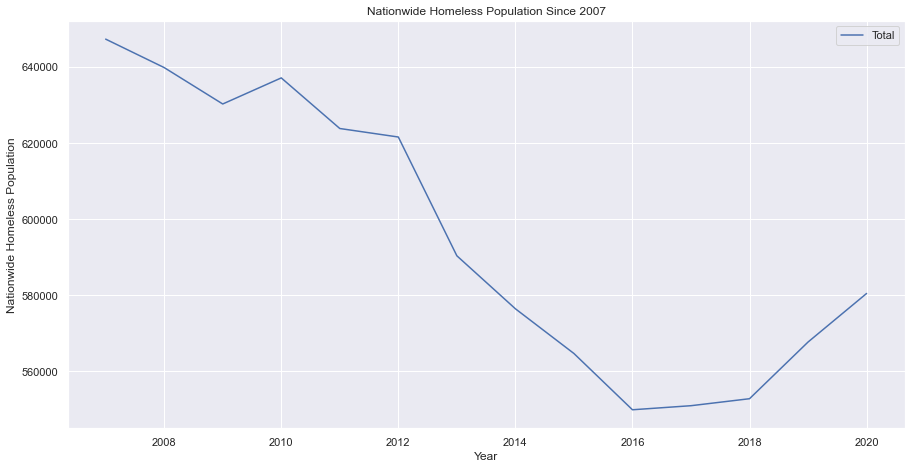

In [209]:
HUDall.plot.line(x="Year", y = "Total", ylabel = "Nationwide Homeless Population", title = "Nationwide Homeless Population Since 2007")

Nationwide homelessness was declining rapidly from 2017 to 2016. However, since 2016, it has been on a steady increase.

### Change In Homelessness Over Time - Louisiana (Since 2007)

<AxesSubplot:title={'center':'Change In Louisiana Homeless Population Since 2007'}, xlabel='Year', ylabel='Louisiana Homeless Population'>

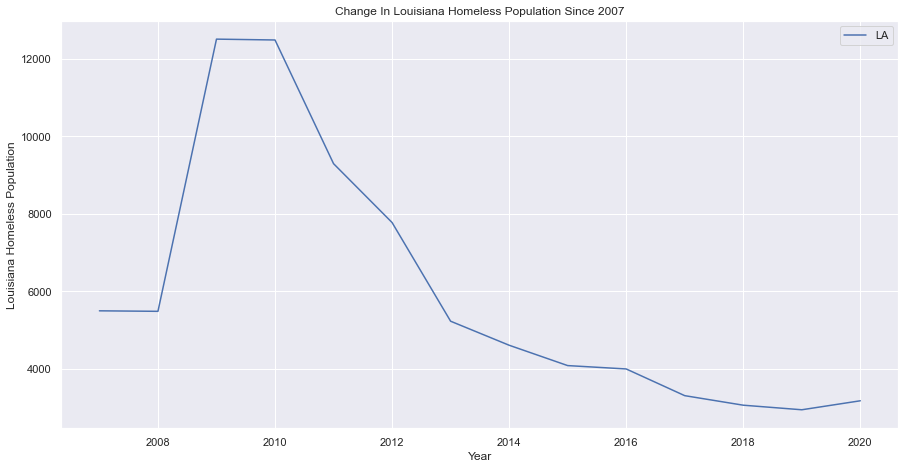

In [210]:
HUDall.plot.line(x="Year", y = "LA", ylabel = "Louisiana Homeless Population", title = "Change In Louisiana Homeless Population Since 2007")

Louisiana saw a quick increase in homelessness from 2008 to 2010. Yet since then the state has been rapidly decreasing its homeless population as it is now the state with the third smallest homeless rate.

### States With The Largest Increase And Decrease In Homelessness

In [211]:
#new df for first and last years data and change row
change = HUDall.loc[[0,13]]
change = change.append(HUDall.loc[1])
change["Year"][1] = "Change"
change.set_index("Year", inplace = True)
change = change.astype(float)
#for loop set change over time in every state
for columns in change:
    change[columns]["Change"] = (float(change[columns][2020]) - float(change[columns][2007])) / float(change[columns][2007])

change = change.loc[["Change"]]
change = change.transpose()
change = change.sort_values(by = "Change",ascending = False)
change.head()

Year,Change
SD,0.827288
NY,0.457980
MT,0.343478
ID,0.323613
MA,0.188273


States with the largest increase in homelessness: South Dakota, New York, Montana, Indiana, Massachussetts

In [499]:
change = change.sort_values(by = "Change",ascending = True)
change.head()

Year,Change
MI,-0.694716
KY,-0.502419
GA,-0.478894
WV,-0.443337
NJ,-0.441954


States with the largest decrease in homelessness: Michigan, Kentucky, Georgia, West Virginia, New Jersey

#### Analysis

Why do these states have such a high homeless rate? Are there any significant stats about their temp, min wage, votes?

In [536]:
df2020["Average Temperature"].median()

51.2

In [537]:
df2020["Minimum Wage"].astype(float).median()

9.0

In [237]:
#South Dakota, New York, Montana, Indiana, Massachussets - largest increase
df2020.loc[[37,36,44,24,34]][["State","Average Temperature","Minimum Wage"]]

,State,Average Temperature,Minimum Wage
37,South Dakota,45.2,9.45
36,New York,45.4,12.50
44,Montana,42.7,8.75
24,Indiana,51.7,7.25
34,Massachusetts,47.9,13.50


All five states were cold than the national average (surprising), you'd expect colder states to have a smaller increase in homelessness. 
3/5 states have a higher minimum wage than the national average (Massachusetts, New York, and South Dakota). Indiana uses the federal minimum wage.

In [238]:
#Michigan, Kentucky, Georgia, West Virginia, New Jersey - largest decrease
df2020.loc[[39,14,4,22,21]][["State","Average Temperature","Minimum Wage"]]

,State,Average Temperature,Minimum Wage
39,Michigan,44.4,9.87
14,Kentucky,55.6,7.25
4,Georgia,63.5,7.25
22,West Virginia,51.8,8.75
21,New Jersey,52.7,12.00


Warmer states - 3/5 were warmer than the national average (suprising).
Kentucky and Georgia use the federal minimum wage, so a decrease in homelessness is suprising, and New Jersey and Michigan are higher than the national average

# Part 3: Conclusions

### Correlated Variables
We looked into three key variables and found their impact on the state of homelessness in 2020. 

1. Average Yearly Temperature - We expect that warmer states will have a higher rate of homelessness.
Results: We were wrong. There was a negative correlation of 9%. Colder states have a higher homeless rate. We believe this was due to New York and Alaska having two of the highest homeless rates while being very cold states.
2. Minimum Wage - We expect states with a higher minimum wage to have a lower rate of homelessness.
Results: We were wrong. There was a positive correlation of 59%. States with a higher minimum wage have a higher homeless rate. We believe this is due to a high homeless population in urban areas and gentrification. 
3. Election Results - We expect states that voted democrat will have a higher homeless rate.
Results: We were right. The homeless rate is democratic states is close to double the rate in republican states (per the 2020 general election).

### Outliers
Our outlier analysis is more than just finding the states with the largest or smallest homeless population. New York is not an outlier, it has a high homeless population because NYC is the largest city in the country. A more surprising statistic was our analysis of Hawaii and Alaska. Both states are seperated from the mainland US, making them harder to reach, and have a low total population. Alaska is surprising because it is the coldest state and has a very high homeless population, and Hawaii is surprising because it had a high minimum wage and a high homeless rate. Mississippi had the lowest homeless rate, which was suprising initially but then looking at our results from correllated variables, they are a Republican state, moderate temperature, and a low minimum wage.

### Nationwide Change Over Time
We had 14 years of HUD PIT data and graphed the national change in homelessness YOY. It begins at a peak in 2007, and then the total begins to drop. We believe the 2007/2008 highs are due to the Great Recession / The Housing Crisis happening. Then the numbers begin to decline, and continue declining at a constant rate. Homelessness is on the decline all the way until 2016. Then, the numbers sharply increase up until today. It is possible that the early shifts could be due to changes in fiscal policy and social sentiment during the Trump administration. In 2020, it is possible that the rise in homelessness is due to the Covid-19 pandemic. Although the government provided many relief subsidies, the pandemic may have a more sizable increase on homelessness than expected. 

### Louisiana
We analyzed the correlated homeless variables in Louisiana and the rate of homelessness in the state and were pleasantly suprised. Despite a high homeless population in New Orleans, Louisiana has the third lowest rate of homeless in the US (following Mississippi and Alabama). Based on our variables this makes sense, Louisiana uses the federal minimum wage, voted Republican, and had a warmer temperature.

### Future Predictions
Going forward, we expect homelessness to rise in the next few years. In March 2022, HUD will release the 2021 PIT Homeless data, and we expect the numbers to be higher than 2020. First, we see an extended impact due to the pandemic. The federal government provided initial relief through stimulus and eviction moratoriums. As we move on from government relief but still live through covid and its difficulties, it is possible that homelessness rises. Parrallels can be drawn to the 2008 Great Recession and the Housing Crisis. The full effects were realized in homelessness until 2010. National homelessness may be on the rise for multiple years. 
Based on the high homeless rate in 2008/2010